<center><h1>Chapter 10 - Convolutional Neural Nets (CNN)</h1></center>

*Convolutional*. Wow, that is a mouthful. Fancy name for something that I think I can make more digestible with some pictures.

I know I am tempting my luck by introducing yet another concept here at the end of the quarter. But I think that most of you will find a use for it in your own studies and research. So here goes.

#1. First up: 2D CNN

The typical problem that a 2-dimensional CNN is trying to solve is image-classification. Images are viewed as a n by m set of pixels. So in the image below, we have a picture of 3 dogs. The actual Python representation of this is as a list of lists (a matrix) of 20 by 20. Each cell in the matrix represents the color (normalized) of a pixel.

<img src='https://miro.medium.com/max/616/1*jrnH-yMLOiSybB1u3I-OVA.png' height=300>


##Plain old ANN not up to the task

We could just flatten the 20x20 matrix into a list of 400 values. Then have an ANN with 400 input nodes. The problem is that a node may learn to spot a nose in the image above. But I could take the same image and shift the dogs to the left in it. Noses are now in a entirely new section of the image and hence are now on different input nodes.

In general, an ANN will be terrible at this task unless we can guarantee that noses, eyes, ears are always in the same set of pixels for each new image.  Kind of a hard problem.

##Someone had an insight: use human image classification as model

What do we know about the visual cortex in human and animals?

<img src='https://www.dropbox.com/s/qgal197po04v2zp/Screenshot%202020-05-29%2015.28.03.png?raw=1' height=300>

<img src='https://www.dropbox.com/s/pzsxah4p943k2ms/Screenshot%202020-05-29%2015.28.25.png?raw=1' height=300>

##What can we learn from this?

We need a way to process pixels within regions. So find a way to keep the 2D matrix as input. Our input is no longer a list of numbers. It is a matrix.

And find a way to mimic the layered architecture of the visual cortex that goes from simple feature detection to complex feature detection.

Let's take the regions first.

<img src='https://www.dropbox.com/s/85cstbzp3bjxyy4/Screenshot%202020-05-31%2011.07.41.png?raw=1' height=600>

##Learning

The filter's values are weights. They start in a random state. They are changed through backpropogation.

##You can have hundreds of filters

Both the number of filters and their dimensions and their stride are hyperparameters.

<img src='https://www.simplilearn.com/ice9/free_resources_article_thumb/pooling.JPG' height=300>

##But wait

Why won't the hundreds of filters just be duplicates of each other? They could be :) They do all convolve in exactly the same way.

But highly unlikely given they all start with separate random weights. In fact, what you find is that they tend to graudally learn different patterns over training. If I take the filters output matrices and print each as an image, I may see something like this (this is for a color image).

<img src='https://www.dropbox.com/s/oeupfxuawe5wyxw/Screenshot%202020-05-29%2013.59.16.png?raw=1' height=300>

##We can have many layers of filters

<img src='https://www.dropbox.com/s/zuwiiubwfyp3q1y/Screenshot%202020-05-30%2011.41.02.png?raw=1'>

##Pooling

Eventually you will want to pool. In essence, take the dominant cell within a region as the representative of that region. It also involves convolution with same hyperparameters: how many poolers, size of each pooler, etc.

<img src='https://www.dropbox.com/s/id9bzmpnzn9dkht/Screenshot%202020-05-30%2011.19.12.png?raw=1'>

##Final piece

The last part of a CNN is a plain old ANN. So you flatten the matrix from the last pooling layer and just feed to an ANN like we have been studying. In the image below, the matrix we flatten is the last layer of the filtering layers.


<img src='https://i0.wp.com/vinodsblog.com/wp-content/uploads/2018/10/CNN-2.png'>



##Let's see it all in action!

I am not going to try to hide the tensorflow code this time. You will need to play with it if you decide post-class that you have some images you might want to try.


In [0]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

##MNIST dataset

What we have done above is split the MNIST dataset of 70K hand-drawn digits, 0-9. We can see that tensorflow has a built-in method to do the splitting into
60K training and 10K testing. Nice of tensorflow.

The goal is to predict the digit given an image.

I'll choose one of the images and show what it looks like in pixelalized form.

Image label:  8


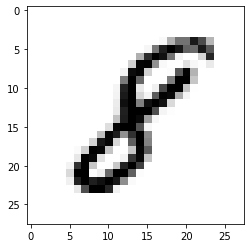

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 7777 # You may select anything up to 60,000
print('Image label: ', y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

##Now some wrangling

Each image is a 28x28 set of pixels where each pixel is a value 0-255. We need to normalize. Just doing simple divide by max.

In [0]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


##The interesting part

Here is where we construct the net architecture. It looks a lot like what you would do with a normal ANN. But some new types of layers are now in play.

In [0]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))  #output

##Model summary

We have a single filter layer (Conv2D) that defines 28 filters of 3x3, and a single pooling layer of 2x2. That's it for the convolution piece. We flatten and then feed that into an ANN hidden layer and then into an output layer. The output layer has 10 nodes, one for each digit.

You can see we are using RELU for hidden layer. We have seen that. What is new is Dropout layer. It's another tool to avoid overfitting.

Also, the output layer has an activation function of softmax where we have seen sigmoid in past. Basically, it is used for multi-class problems.

In the end, a pretty simple network architecture. Let's see how it does.

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


##More hyperparameters

I was hiding these from you. Now they are out in the open. The loss function is kind of interesting. We have 10 output nodes and would normally compute the loss for each separately then combine. The cross-entropy idea is that you look at all 10 outputs at once and see how things are shifted around within the 10 "bins".

Let's give 10 epochs a shot. See how we do.

In [0]:
%%time

model.fit(x=x_train,y=y_train, epochs=10)  #about a minute

Epoch 1/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.2068 - accuracy: 0.9378
Epoch 2/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.0884 - accuracy: 0.9736
Epoch 3/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.0596 - accuracy: 0.9813
Epoch 4/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.0478 - accuracy: 0.9841
Epoch 5/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.0371 - accuracy: 0.9877
Epoch 6/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.0288 - accuracy: 0.9900
Epoch 7/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.0278 - accuracy: 0.9906
Epoch 8/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.0226 - accuracy: 0.9919
Epoch 9/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.0205 - accuracy: 0.9929
Epoch 10/10
60000/60000 [=====================

##Run on test set

In [0]:
model.evaluate(x_test, y_test)


10000/10000 [==============================] - 1s 68us/step


[0.06255018095753415, 0.9847999811172485]

##Results

A final loss of .057 and accuracy of .986. Caveat: I have not tried to seed the random number generators so these values change slightly everytime.

We could get very close to 100% by exploring different values of hyperparameters.

##Just to show how we did on one test image

Notice the image is kind of sloppy. But still got correct prediction.

Prediction: 9


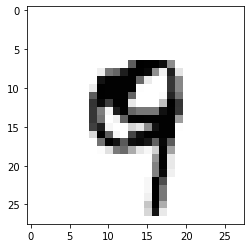

In [0]:
image_index = 4444
img_rows = 28
img_cols = 28
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, img_rows, img_cols, 1))
print('Prediction:', pred.argmax())

##Is that the end of the story?

You may be saying, that's all cool, Steve, but I don't have images I am working with. I think I still have something for you :)

#1D CNNs (Yes, 1 Dimensional!)

Some clever person noticed that the same ideas we have been applying to 2D data, e.g., images, can apply to 1D data of a certain type. In particular, some data we might be interested in has an implied adjacency. Examples include a sentence, where the adjacency of words matter. 

<img src='https://missinglink.ai/wp-content/uploads/2019/03/1D-convolutional-example_2x.png' height=300>

In above, think of each word represented by a 300 element embedding vector. So we have a matrix of 9x300.

Or time-series data like the stock-market, EEGs, etc., where the adjacency is in time steps.

<img src='https://www.dropbox.com/s/kl9c95zmlqbljab/Screenshot%202020-05-29%2015.41.33.png?raw=1' height=300>

##Example using text

The problem is determining the sentiment of movie reviews on the IMDB web site. Each sample is a single review (multiple sentences). Example:

<i>
A bright spot here or there, but not worth your time to watch. I would write a longer review, but want to lead by example; the time you spend reading this should be equal to or lesser than the time you spend watching this show.
</i>

The classification is binary: 0 for negative sentiment and 1 for positive sentiment.

This is a standard problem so built-in methods for loading the data and splitting into train and test sets.

In [0]:
max_features = 5000
maxlen = 400
batch_size = 32
embedding_dims = 50
filters = 250
kernel_size = 3
hidden_dims = 250
epochs = 2

In [0]:
from __future__ import print_function
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.datasets import imdb

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 400)
x_test shape: (25000, 400)


##Build and compile the model

Steps below are similar to our MNIST example. What is new is the Embedding layer. What this does is produce something like the spacy word-vectors (300 dim) that we have been using. However, it is not as powerful as spacy. So woud be better off bringing in spacy here and use its vectors. But trying to keep it simple(ish).

In [0]:

print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn
# word group filters of size filter_length:
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


Build model...


##Model summary

The main bit is the use of one filter layer (Conv1D) with 250 filters of size 3, and one Pooling layer. 

For the backend ANN, we have one hidden layer of 250 nodes and an output layer.
Since the output is binary, we only need 1 output node and can use sigmoid.

In [0]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 6s 241us/step - loss: 0.3901 - accuracy: 0.8092 - val_loss: 0.2681 - val_accuracy: 0.8862
Epoch 2/2
25000/25000 [==============================] - 6s 231us/step - loss: 0.2217 - accuracy: 0.9103 - val_loss: 0.2636 - val_accuracy: 0.8906


In [0]:
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test accuracy:', acc)

25000/25000 [==============================] - 2s 63us/step
Test accuracy: 0.8906000256538391


##89% accuracy with only 2 epochs

Not bad.

##Look at 1D on time-series

I am going to discuss a tutorial using Human Activity Recognition (HAR). I am not going to actually run the code, but instead show you snippets.

Here is the site I am using.

<img src='https://www.dropbox.com/s/jssm9m1e4osh3e4/Screenshot%202020-05-30%2015.00.19.png?raw=1'>

##Here is what the data looks like conceptually

<img src='https://www.dropbox.com/s/0wzfjkx3h4nsg28/Screenshot%202020-05-30%2015.03.51.png?raw=1' height=300>

So a sample is a sequence (time-series) of 3 channels x,y,z. These 3 channels correspond to the reading obtained from a cell-phone accelerometer. The goal is to classify each sample into one of a set of activites such as walking, jogging, climbing stairs, etc.

##The model

As you can see in the model below, there are 2 Conv1D filter layers, back to back. Then a Pooling layer. Then one hidden layer and an output layer with a node for each type of activity.

<pre>
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
</pre>

So why did I decide not to run this? Because the data wrangling is a major pain in the butt. The HAR data is spread all over the place in multiple files. I suppose it could be converted into a google sheet form, but I did not try. Sorry.

On the plus side, if you want to actually read these files from your local computer, you can set up google colab to do that. Or just run a notebook from your own jupyter server, which is what Jason is doing in this tutorial. Then easy-peasy to read files off your own computer.






##The results

Jason reports an accuracy of 91% on testing data.

##One more example

<img src='https://www.dropbox.com/s/kjiea89c7tux75d/Screenshot%202020-05-31%2010.39.27.png?raw=1' height=300>
<hr>
A predictive model for the function of non-coding DNA (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4914104/). I am including this as "sequences show up all over the place". If you have data that has adjacency features, a 1D CNN might be for you.

#What more do you need?

If you have images that need classification, then there are lots of online tutorials. The biggest issue may be wrangling your images to make sure they are in a form that a 2D CNN is happy with.

If you have text or time-series data, the path is a bit more challenging. This is a very active research area. Things don't stay still for long. To give a plug to Jason, he has a book out on using machine learning for time-series data that is aimed at the beginner. If is relatively recent.

I should also note that the two examples I showed with 1D data are perhaps the easiest. Given a fixed sequence of data (e.g., a movie review, a time-slice of accelerometer data), classify/label it in some way. What has gained attention recently is not classifying what we have seen but instead predicting what comes next. If I give my model the start of a sentence, predict what will be the next word. If I give my model accelerometer data, predict what the user will do next. This brings in a new type of model called a "recurrent neural net" or RNN. It is the type of model that makes headlines by winning games (Go, Chess, Smash Brothers). It is used by Autonomous cars to predict what others on the road will do.